# Visualizing Regularization of DDNet Trained on CIFAR10

In this notebook I visualize DDNet models trained on the CIFAR10 dataset using various regularization techniques. The DDNet model and the CIFAR10 dataset were set up as in Hoffman 2019 (for all the models). The CIFAR10 data is preprocessed by normalizing using mean [0.5, 0.5, 0.5] and variance [0.5, 0.5, 0.5]. The batch size is 100. The model optimizes using SGD with momentum p = 0.9, and standard cross-entropy loss. Model parameters are initialized using Glorot initialization (See Glorot & Bengio 2010), expect for SVB regularization which uses orthogonal initialization. Models are trained with no regularization, L2 regularization, SVB regularization and Jacobian regularization with a dropout rate of p_drop = 0.5. I also train a model with Jacobian Regularization without dropout. The L2 regularization coefficient and Jacobian regularization coefficient are the same as in Hoffman 2019: l2_lmbd = 0.0005 and lambda_jacobian_reg = 0.01. For SVB regularization I use the hyperparameters svb_freq=600 and svb_eps = 0.05. The learning rate starts at 0.1, and is reduced to 0.01 and 0.001 1/3 and 2/3s into training, respectively. The models are trained for 50 epochs.

### Imports and Model Loading

In [ ]:
import jupyter_black
import torch
from torchsummary import summary

from data_generators import data_loader_CIFAR10
from model_classes import DDNet
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_decision_boundary,
    plot_and_print_img,
    generate_random_vectors,
    get_random_img,
    plot_fgsm,
    plot_multiple_fgsm,
    plot_pgd,
    plot_multiple_pgd,
)
from tools import ModelInfo

jupyter_black.load()

In [ ]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST data
train_loader, test_loader = data_loader_CIFAR10()

# Summary of model
summary_model = DDNet().to(device)
summary(summary_model, (3, 32, 32))

In [ ]:
# Load models
dataset = "cifar10"
model_names = [
    "model_no_reg_0",
    "model_l2_0",
    "model_jacobi_0",
    "model_jacobi_no_dropout_0",
    "model_svb_0",
]
models = {name: ModelInfo(name, dataset) for name in model_names}

### Plots of Accuracy Curves

In [ ]:
for model_name in model_names:
    if model_name.startswith("model_no_reg"):
        plot_results(models, model_name, title=f"{model_name}")
    else:
        plot_reg_results(models, model_name, title=f"{model_name}")

### Plots of Decision Boundaries

In [ ]:
for model_name in model_names:
    image = get_random_img(test_loader)
    v1, v2 = generate_random_vectors(image)
    plot_and_print_img(
        image, models[f"{model_name}"].model, device, f"{model_name}", dataset
    )
    plot_decision_boundary(
        models[f"{model_name}"].model,
        image,
        v1,
        v2,
        device,
        resolution=300,
        dataset="cifar10",
        title=f"{model_name}",
    )

### Plots of Results of FGSM Attacks

In [ ]:
for model_name in model_names:
    print(f"FGSM Attack Against Model: {model_name}")
    plot_fgsm(models[f"{model_name}"].model, model_name, device, test_loader, dataset)

In [ ]:
plot_multiple_fgsm(models, model_names, device, test_loader, dataset)

### Plots of Results of PGD Attacks

PGD Attack Against Model: model_no_reg_0


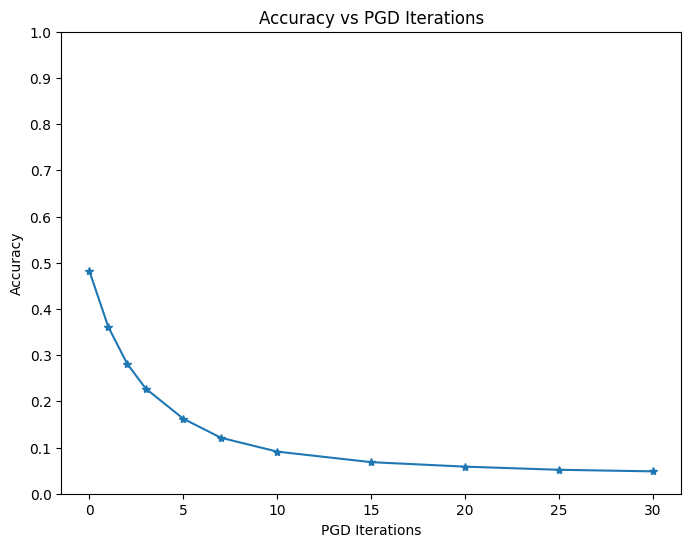

PGD Attack Against Model: model_l2_0


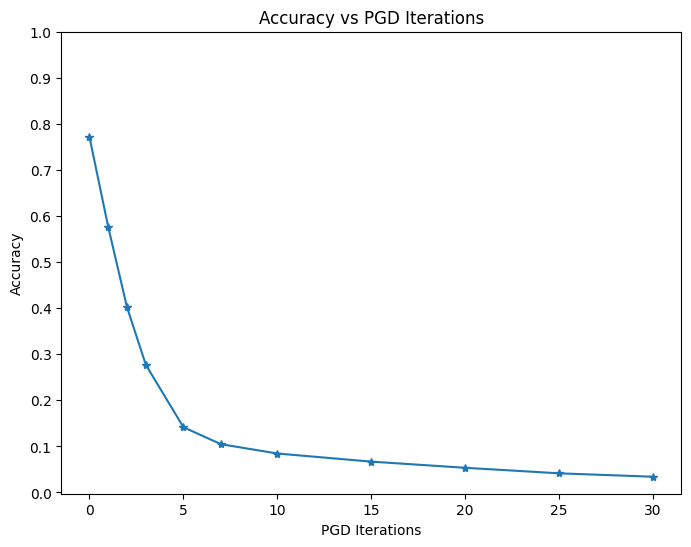

PGD Attack Against Model: model_jacobi_0


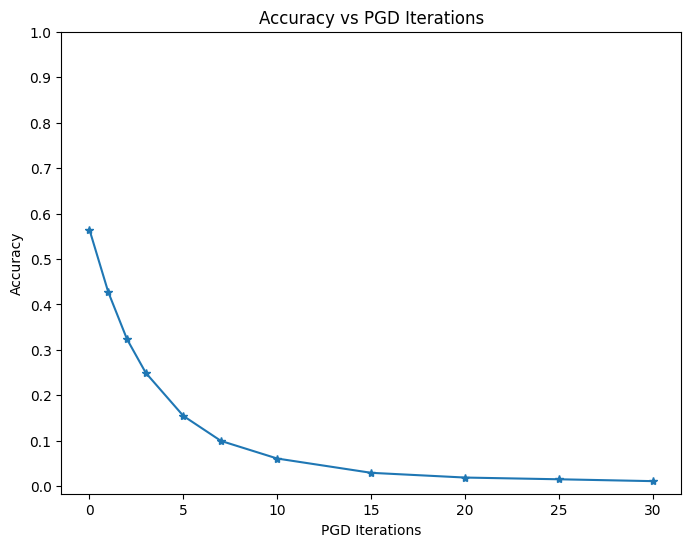

PGD Attack Against Model: model_jacobi_no_dropout_0


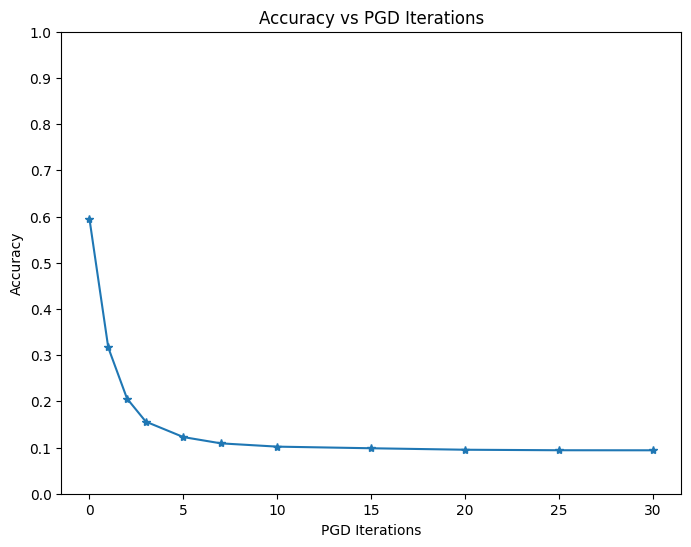

PGD Attack Against Model: model_svb_0


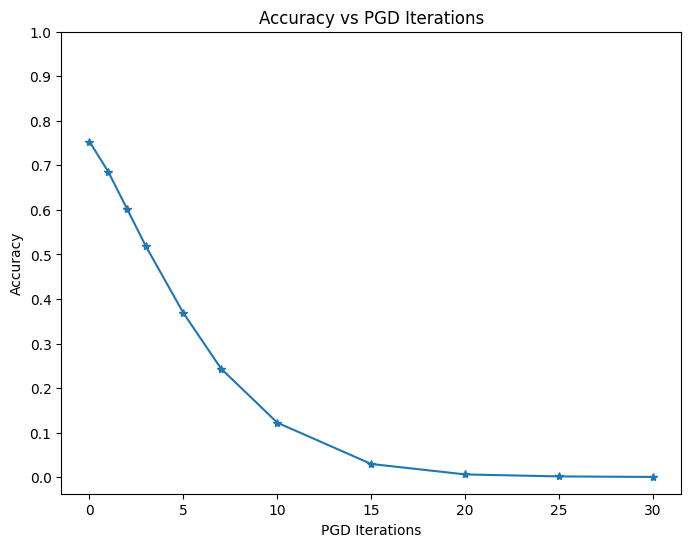

In [10]:
for model_name in model_names:
    print(f"PGD Attack Against Model: {model_name}")
    plot_pgd(
        models[f"{model_name}"].model,
        model_name,
        device,
        test_loader,
        dataset,
    )

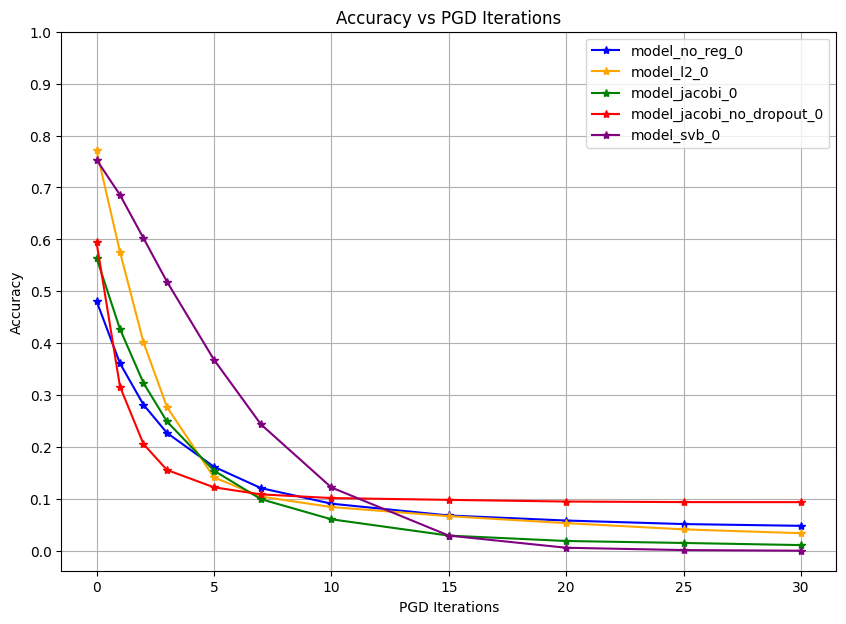

In [11]:
plot_multiple_pgd(models, model_names, device, test_loader, dataset)